Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Load Dataset

In [2]:
i_data=pd.read_csv('/content/IRIS.csv')
i_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Basic Information of dataset

In [3]:
#Basic Information of dataset
i_data.info()
print("\n")

#Statistical Measures
print(i_data.describe())
print("\n")

#Number of rows and columns in dataset
print(i_data.shape)
print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



Exploratory Data Analysis

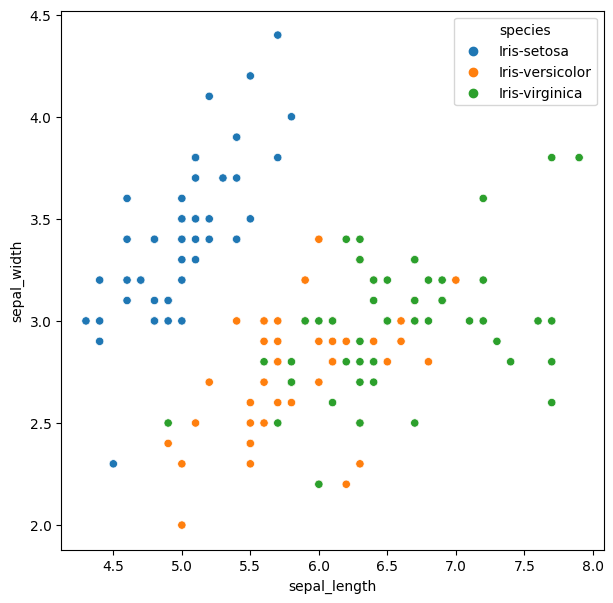

In [ ]:
#Scatter plot of sepal length vs. sepal width
plt.figure(figsize=(7,7))
sns.scatterplot(x="sepal_length", y="sepal_width", data=i_data, hue="species")
plt.show()


<Axes: >

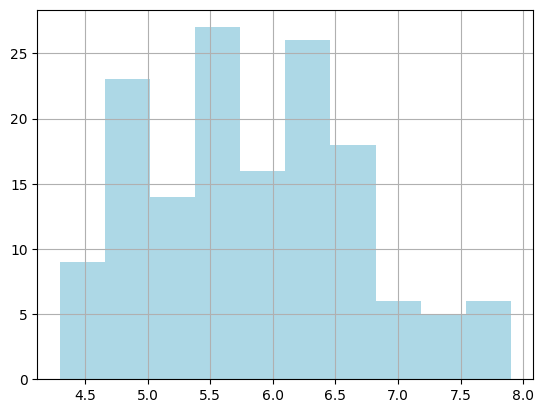

In [4]:
#Sepal_length plot
i_data['sepal_length'].hist(color ='lightblue')

<ipython-input-5-888aca9b8115>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = i_data.corr()


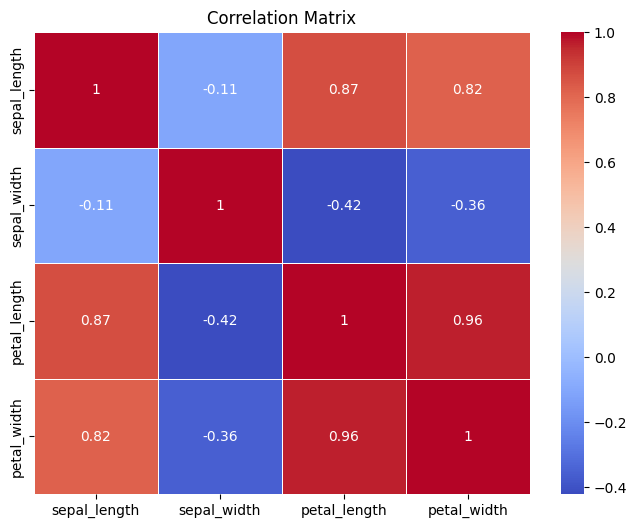

In [5]:
# Correlation matrix
correlation_matrix = i_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


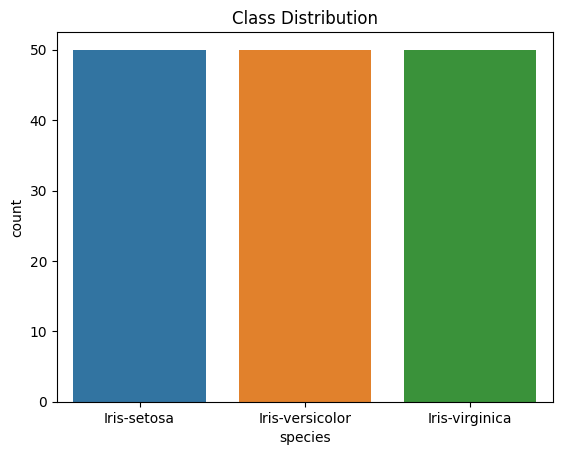

In [6]:
# Class distribution
sns.countplot(x='species', data=i_data)
plt.title('Class Distribution')
plt.show()

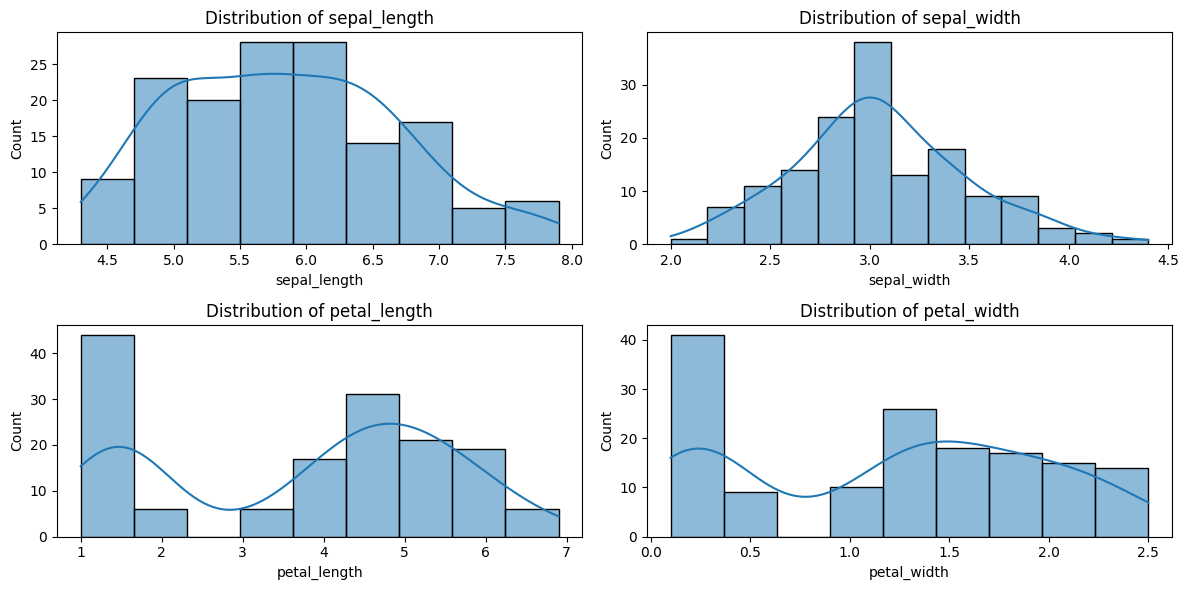

In [8]:
# Feature distributions
plt.figure(figsize=(12, 6))
features = i_data.columns[:-1]  # Exclude the 'species' column
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=i_data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

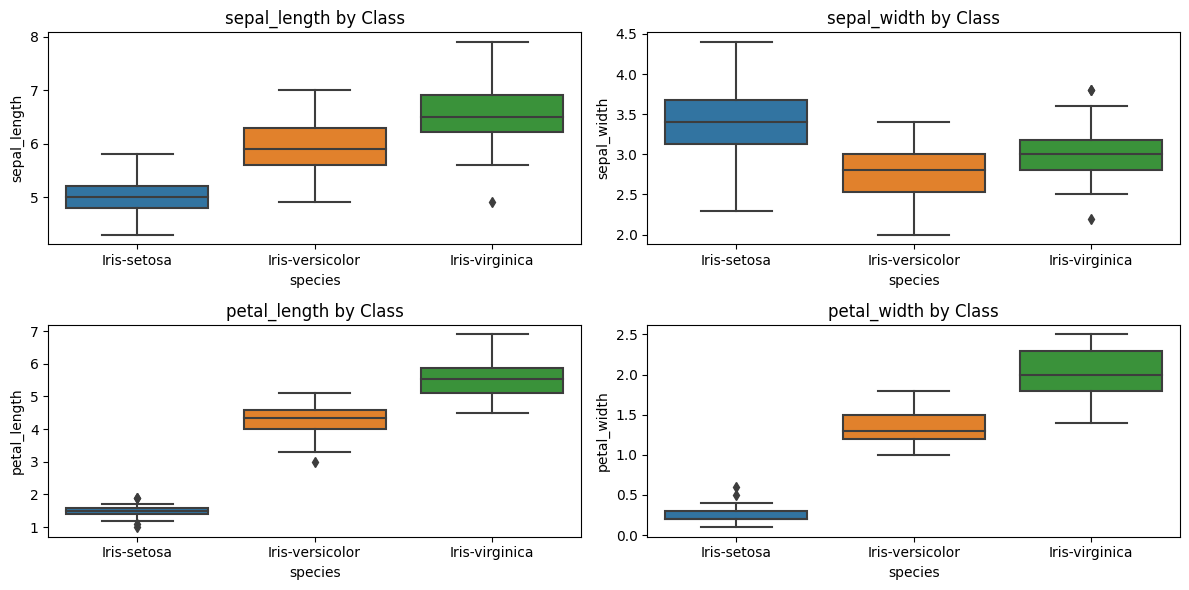

In [9]:
# Boxplots for each feature by class
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=feature, data=i_data)
    plt.title(f'{feature} by Class')
plt.tight_layout()
plt.show()

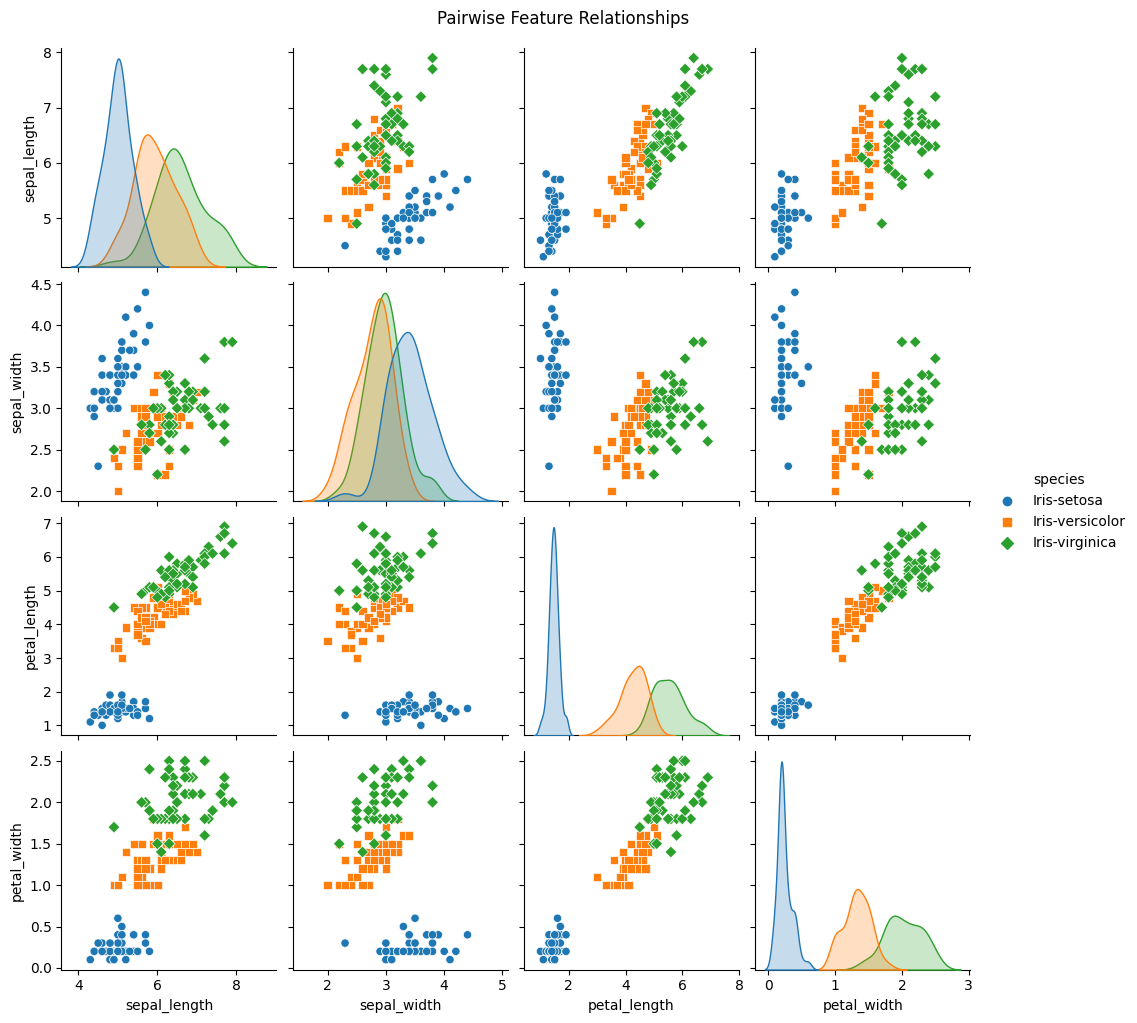

In [ ]:
# Pairwise feature relationships
sns.pairplot(i_data, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()


Preprocessing Data

In [10]:
#Number of missing values
print(i_data.isnull().sum())
print("\n")

#Number of species
print(i_data['species'].value_counts())
print("\n")

X = i_data.iloc[:, :-1].values
y = i_data.iloc[:, -1].values
print(X)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 

Splitting data into test and train sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training the models

In [13]:
# Train Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Train Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)

# Train Random Forest
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)

#Train Support Vector Machine
Suport_vector_machine = SVC(kernel='linear', C=1, random_state=42)
Suport_vector_machine.fit(X_train, y_train)




SVC(C=1, kernel='linear', random_state=42)

Evaluate the models

In [14]:
#Evaluate and predict models on test data
# Predict and evaluate Logistic Regression
logistic_predictions = logistic_classifier.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
Log_confusion_mat = confusion_matrix(y_test,logistic_predictions )

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n",  confusion_matrix(y_test, logistic_predictions))
print("\n")

# Predict and evaluate decision tree
decision_tree_predictions = decision_tree_classifier.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
tree_confusion_mat= confusion_matrix(y_test,logistic_predictions )

print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Classification Report:\n", classification_report(y_test, decision_tree_predictions))
print("Confusion Matrix:\n",  confusion_matrix(y_test, decision_tree_predictions))
print("\n")

# Predict and evaluate random forest
random_forest_predictions = random_forest_classifier.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_matrix= confusion_matrix(y_test,random_forest_predictions )

print("Random Forest Accuracy:", random_forest_accuracy)
print("Classification Report:\n", classification_report(y_test, random_forest_predictions))
print("Confusion Matrix:\n",  confusion_matrix(y_test, random_forest_predictions))
print("\n")

# Predict and evaluate SVM
SVM_predictions = random_forest_classifier.predict(X_test)
SVM_accuracy = accuracy_score(y_test, SVM_predictions)
SVM_matrix= confusion_matrix(y_test,SVM_predictions )

print("SVM Accuracy:", SVM_accuracy)
print("Classification Report:\n", classification_report(y_test, SVM_predictions))
print("Confusion Matrix:\n",  confusion_matrix(y_test, SVM_predictions))


Logistic Regression Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision Tree Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  